In [89]:
import numpy as np
import pandas as pd

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv('trades/2011-07.csv')

## Some useful transformations

In [92]:
price_usd = pd.DataFrame(data["Money"]/data["Bitcoins"], columns=['Price_USD'])
data = data.join(price_usd)
import datetime
data["Date"] = pd.to_datetime(data.Date)

In [93]:
data.head()

,Trade_Id,Date,User_Id,Japan,Type,Currency,Bitcoins,Money,Money_Rate,Money_JPY,Money_Fee,Money_Fee_Rate,Money_Fee_JPY,Bitcoin_Fee,Bitcoin_Fee_JPY,Price_USD
0,1309478459355721,2011-07-01 00:00:59,61717,NJP,buy,USD,0.100000,1.61010,80.433128,129.505380,0,80.433128,0,0.0003,0.389795,16.101000
1,1309478459355721,2011-07-01 00:00:59,4125,NJP,sell,USD,0.100000,1.61010,80.433128,129.505380,0,80.433128,0,0.0000,0.000000,16.101000
2,1309478466574560,2011-07-01 00:01:06,57157,NJP,buy,USD,1.000000,16.10098,80.433128,1295.052186,0,80.433128,0,0.0000,0.000000,16.100980
3,1309478466574560,2011-07-01 00:01:06,4125,NJP,sell,USD,1.000000,16.10098,80.433128,1295.052186,0,80.433128,0,0.0000,0.000000,16.100980
4,1309478468980270,2011-07-01 00:01:08,337,NJP,buy,USD,1.705052,27.45300,80.433128,2208.130665,0,80.433128,0,0.0000,0.000000,16.100978


In [94]:
plt.rcParams['figure.figsize'] = (19.0, 12.0)
#plt.plot(data["Date"],data["Price_USD"])

In [95]:
#data[data["Price_USD"] > 5000]

### K = 10

In [96]:
K = 10

## Top K buyers

In [97]:
grouped = data[data.Type == 'buy'].groupby('User_Id')
btc_vol = grouped.sum()['Bitcoins']
#usd_vol = grouped.sum()['Money']
sorted_buyers = btc_vol.sort_values(ascending=False,inplace=False)
top_buyers = sorted_buyers[:K]
buyers = np.array(top_buyers.index)

## Top K sellers

In [98]:
grouped = data[data.Type == 'sell'].groupby('User_Id')
btc_vol = grouped.sum()['Bitcoins']
#usd_vol = grouped.sum()['Money']
sorted_sellers = btc_vol.sort_values(ascending=False,inplace=False)
top_sellers = sorted_sellers[:K]
sellers = np.array(top_sellers.index)

# Buy-Sell Matrix

In [99]:
unique_users = np.unique(data["User_Id"])
n_users = len(unique_users)
buy_sell_mat = np.zeros((n_users,n_users))

In [100]:
def user2index(user_id):
    return np.where(unique_users == user_id.reshape(np.array(user_id).shape[0],1))

In [101]:
matrix_index = pd.DataFrame(user2index(data["User_Id"])[1], columns=['Matrix index'])
data = data.join(matrix_index)

In [102]:
trades_grouped = data.groupby('Trade_Id')
for trade, group in trades_grouped:
    ind0 = group.index[0]
    ind1 = group.index[1]
    i = group.loc[ind0]['Matrix index']
    j = group.loc[ind1]['Matrix index']
    if group.loc[ind0]['Type'] == 'buy':
        buy_sell_mat[i,j] += group.loc[ind0]['Bitcoins']
    else:
        buy_sell_mat[j,i] += group.loc[ind0]['Bitcoins']

## Regarder
http://networkx.github.io/

https://networkx.github.io/documentation/latest/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html

http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/

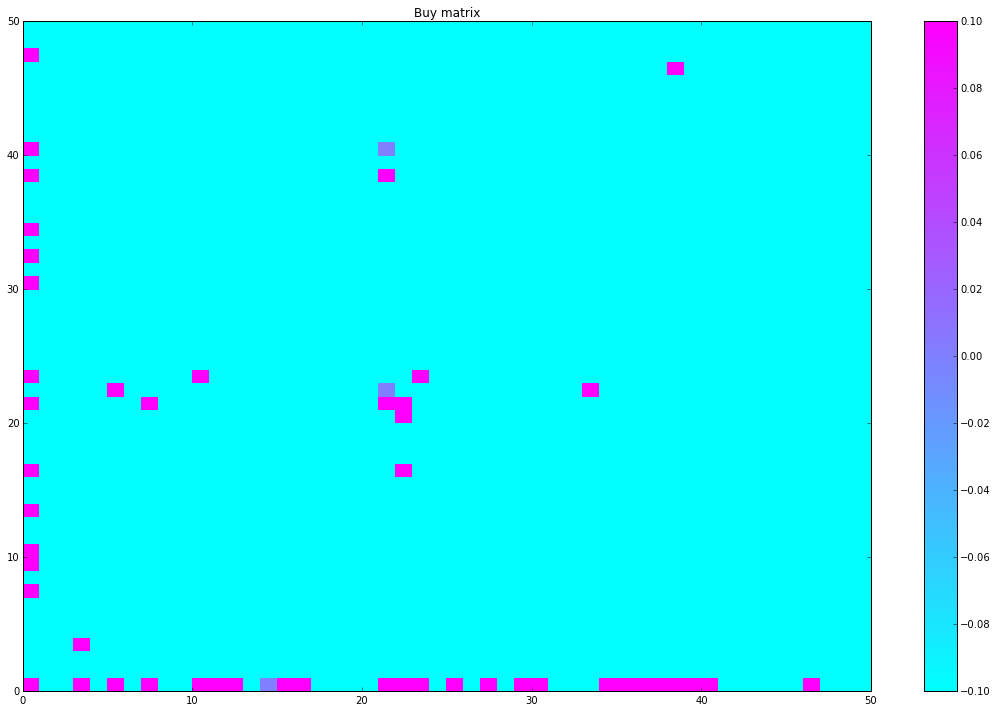

In [103]:
plt.pcolor(np.log(buy_sell_mat)[:50,:50],cmap=plt.cm.cool)
plt.title("Buy matrix")
plt.colorbar()
plt.show()
plt.close()

## useful code to plot histograms with same axes

In [ ]:
plt.rcParams['figure.figsize'] = (19.0, 12.0)
f, axes = plt.subplots(10, sharex=True, sharey=True)
for i, axi in enumerate(axes):
    axi.hist(comp_martingale[i],bins=20)
f.subplots_adjust(hspace=0)